# FIXED COUPON BOND EXAMPLE TREASURY

This is a US Treasury bond analysis based on example in https://data.bloomberglp.com/bat/sites/3/2017/07/SF-2017_Paul-Fjeldsted.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import financepy

####################################################################
# FINANCEPY BETA Version 0.220 - This build:  20 Mar 2022 at 00:28 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
from financepy.utils.date import Date, set_date_format, DateFormatTypes
from financepy.products.bonds import *
from financepy.utils.amount import *

In [4]:
set_date_format(DateFormatTypes.US_LONG)

# Define the Bond

In [5]:
issue_date = Date(15, 5, 2010)
maturity_date = Date(15, 5, 2027)
coupon = 0.02375
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
face = ONE_MILLION

In [6]:
bond = Bond(issue_date, maturity_date, coupon, freq_type, accrual_type, face)

In [7]:
clean_price = 99.7808417  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [47]:
print(bond)

OBJECT TYPE: Bond
ISSUE DATE: MAY-15-2010
MATURITY DATE: MAY-15-2027
COUPON: 2.375
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: DayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 1000000


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [9]:
settlement_date = Date(21, 7, 2017)

In [10]:
bond.print_flows(settlement_date)

 NOV-17-2017     11875.00 
 MAY-17-2018     11875.00 
 NOV-19-2018     11875.00 
 MAY-17-2019     11875.00 
 NOV-18-2019     11875.00 
 MAY-18-2020     11875.00 
 NOV-17-2020     11875.00 
 MAY-17-2021     11875.00 
 NOV-17-2021     11875.00 
 MAY-17-2022     11875.00 
 NOV-17-2022     11875.00 
 MAY-17-2023     11875.00 
 NOV-17-2023     11875.00 
 MAY-17-2024     11875.00 
 NOV-18-2024     11875.00 
 MAY-19-2025     11875.00 
 NOV-17-2025     11875.00 
 MAY-18-2026     11875.00 
 NOV-17-2026     11875.00 
 MAY-17-2027   1011875.00 



The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

Yield to maturity using different conventions

In [38]:
print("Current Yield %29.7f" % (bond.current_yield(clean_price)*100))

for ytmCalcType in YTMCalcType:
    y = bond.yield_to_maturity(settlement_date, clean_price, ytmCalcType)
    print("%-30s %12.7f" % (ytmCalcType, y*100))

Current Yield                     2.3802164
YTMCalcType.UK_DMO                2.3999902
YTMCalcType.US_STREET             2.3999902
YTMCalcType.US_TREASURY           2.3998032


## Price-Yield

Some bond function such as yield to maturity support vectorisation

In [43]:
clean_prices = np.linspace(50,150,100)
ylds = bond.yield_to_maturity(settlement_date, clean_prices, YTMCalcType.US_TREASURY)

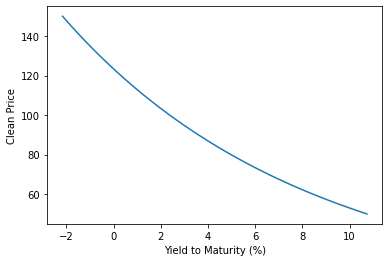

In [44]:
plt.figure(figsize=(6,4))
plt.plot(ylds*100.0, clean_prices)
plt.xlabel("Yield to Maturity (%)")
plt.ylabel("Clean Price");
plt.savefig("BondPriceYield.png")

## Accrued Interest

I use the US Street convention

In [ ]:
yieldConvention = YTMCalcType.US_STREET

In [ ]:
ytm = bond.yield_to_maturity(settlement_date, clean_price, yieldConvention)

Full price is the clean price plus accrued interest

In [ ]:
print("Full Price : %12.9f" % bond.full_price_from_ytm(settlement_date, ytm, yieldConvention))
print("Clean Price : %12.6f" % bond.clean_price_from_ytm(settlement_date, ytm, yieldConvention))

Accrued interest is accrued from previous coupon date to settlement date

In [ ]:
print("Previous coupon date: ", bond._pcd)
print("Settlement date: ", settlement_date)
print("Accrued: %12.2f" % bond._accrued_interest)
print("Accrued Days: %d" % bond._accrued_days)
print("Principal: %12.2f" % bond.principal(settlement_date, ytm, yieldConvention))

## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [ ]:
dollar_duration = bond.dollar_duration(settlement_date, ytm, yieldConvention)
modified_duration = bond.modified_duration(settlement_date, ytm, yieldConvention)
macauley_duration = bond.macauley_duration(settlement_date, ytm, yieldConvention)
conv = bond.convexity_from_ytm(settlement_date, ytm, yieldConvention)

print("Dollar Duration: ", dollar_duration)
print("Modified Duration: ", modified_duration)
print("Macauley Duration: ", macauley_duration)
print("Convexity: ", conv)

Copyright (c) 2020 Dominic O'Kane